## Klasifikasi digit tulisan tangan menggunakan Neural Network

Mengimplementasikan Neural Network untuk mengklasifikasi digit tulisan tangan dalam 10 kelas (0-9) 

Mengimport library

In [38]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt

import numpy as np

Pertama-tama kita megimpor datasetnya, yang mana telah disediakan oleh tensorflow

In [42]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

print(len(x_train), len(x_test))

60000 10000


Data yang baru saja di-load berisi 70000 gambar 28 x 28 yang merupakan gambar digit tulisan tangan, yang mana jika diprint hanya menampilkan angka 0-255 yang merepresentasikan seberapa terang/gelap piksel tersebut

Untuk melihat gambar digit tulisan tangan tersebut kita bisa menggunakan matplotlib

(28, 28)


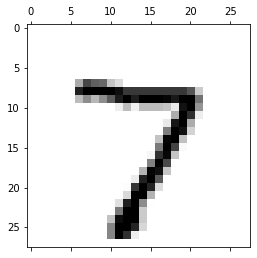

In [43]:
# print(x_train[0])
print(x_test[0].shape)
plt.matshow(x_test[0], cmap='binary') # cmap bisa binary atau gray

Sebelum melangkah dalam proses training neural network kita sebaiknya melakukan pre-processing dan dalam kasus ini yaitu normalisasi dan mereshape matriks menjadi 1 dimensi

#### Normalisasi

Metode normalisasi yang akan digunakan di sini cukup simpel yaitu hanya dengan membagi setiap fitur/matriks dengan 255

In [44]:
x_train= x_train/255
x_test= x_test/255

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Flatten matrix

Me-reshape matriks menjadi matriks 1d

In [45]:
# Menggunakan method reshape untuk mengubah semua matrix dalam array menjadi panjang x lebar gambar
x_train_flattened= x_train.reshape(len(x_train), x_train.shape[1]*x_train.shape[2])
x_test_flattened= x_test.reshape(len(x_test), x_test.shape[1]*x_test.shape[2])

x_train_flattened.shape

(60000, 784)

### Training model

In [46]:
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2476 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0744 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0564 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0376 - accuracy: 0.9881: 1s -
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0260 - accuracy: 0.9916: 0s - loss: 0.0261 - accuracy: 0.99
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.99 - 2s 1ms/step - loss: 0.0254 - accuracy: 0.991

### Evaluasi model

In [47]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 994us/step - loss: 0.1004 - accuracy: 0.9767


[0.10039204359054565, 0.9767000079154968]

Misal kita ingin melihat klasifikasi untuk x_test indeks ke-0

In [48]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.4453104e-03, 1.9425154e-03, 5.6417823e-02, 7.7205765e-01,
       1.2922719e-06, 3.2953024e-03, 4.9851747e-07, 9.9999940e-01,
       2.3780704e-02, 9.7654408e-01], dtype=float32)

In [49]:
np.argmax(y_predicted[0])

7

In [55]:
def compare_predictions(pred_arr, true_arr, index):
    print('Gambar: ')
    plt.matshow(true_arr[index], cmap='binary')
    plt.show()
    
    print('Prediksi:', np.argmax(pred_arr[index]))

Gambar: 


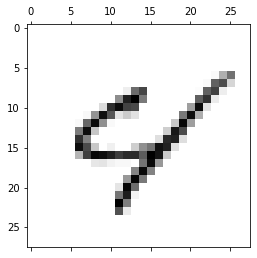

Prediksi: 4


In [61]:
compare_predictions(y_predicted, x_test, 420)